#### [ 산점도 - 버블 그래프 ]
- 두개의 컬럼(변수)의 관계를 시각화해서 표현
- 연속형(수치형) 데이터에 사용함

In [13]:
# [1] 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# [2] 데이터 준비
F_DATA =r'C:\Users\kdp\Desktop\KDT\EX_PANDAS06\data\auto_mpg.csv'

In [15]:
# [3] CSV -> DF 저장
dataDF=pd.read_csv(F_DATA)

In [16]:
# - 컬럼별 타입 확인
dataDF.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [17]:
# [4] 연비와 관련이 높은 컬럼 즉, 변수 확인
# - [4-1] 상관계수 확인 
corrSR=dataDF.corr(numeric_only=True)['mpg']
round(corrSR['weight'],2)
corrSR

mpg             1.000000
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
acceleration    0.420289
model year      0.579267
origin          0.563450
Name: mpg, dtype: float64

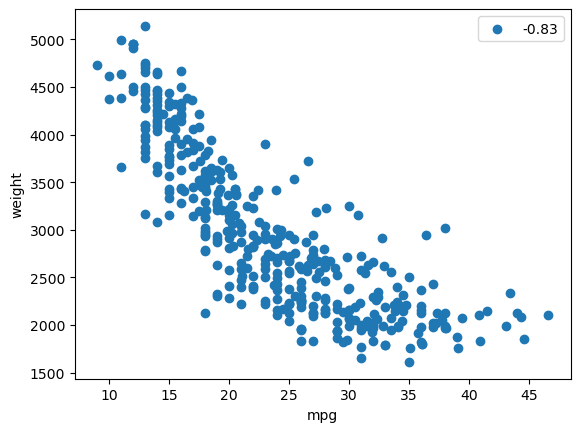

In [18]:
# [4-2] 상관계수 시각화
plt.scatter(dataDF['mpg'],dataDF['weight'],label=round(corrSR['weight'],2))
plt.xlabel('mpg')
plt.ylabel('weight')
plt.legend()
plt.show()

TypeError: can only concatenate str (not "int") to str

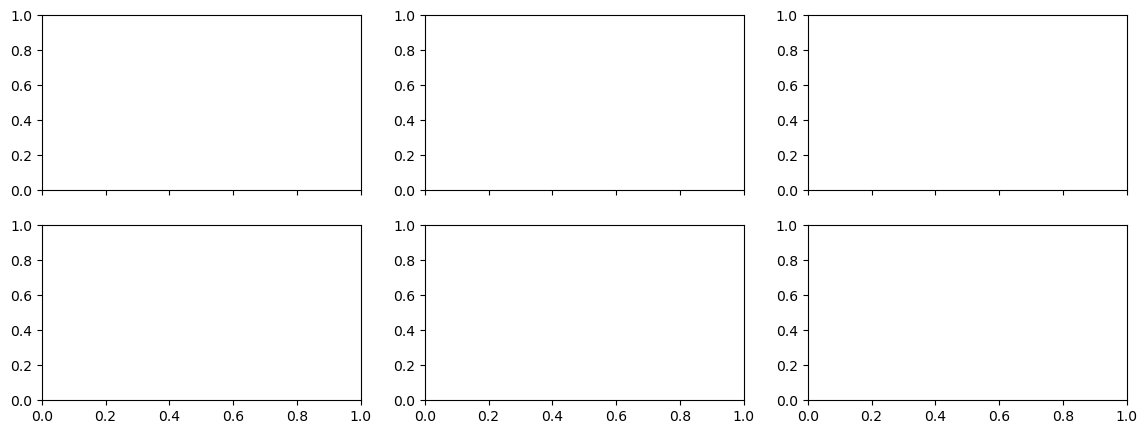

In [19]:
# - [4-3] mpg 컬럼과 다른 컬럼관의 관계 시각화
# - (1) 그래프 담을 창 생성
fig=plt.figure(figsize=(14,5))

# - (2) 그래프 담을 공간 생성 axes
axs=fig.subplots(2,3,sharex=True)
axs[0,0].scatter(dataDF['mpg'],dataDF[corrSR.index+1])
for row in range(2):
    for col in range(3):
        col_name=corrSR.index[row*3+col+1]
        axs[row,col].scatter(dataDF['mpg'],dataDF[col_name],label=round(corrSR[col_name],2))
        axs[row,col].set_title(f'mpg-{col_name}')

fig.suptitle("[mpg & columns]",fontsize=25)
plt.show()
        

In [ ]:
# # [4-3] mpg 컬럼과 다른 컬럼과의 관계 시각화
# for idx in corrSR.index:
#     plt.scatter(dataDF['mpg'],dataDF[idx],label=f'({round(corrSR[idx],2)})')
#     plt.xlabel('mpg')
#     plt.ylabel(idx)
#     plt.legend()
#     plt.show()

### [5] 연비와 무게, 실린더 수의 관계 시각화
    - 연비와 무게 반비례 관계, 상관관계가 높음
    - 연비와 실린더 갯수도 반비례 관계

In [29]:
dataDF['cylinders'].value_counts()

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


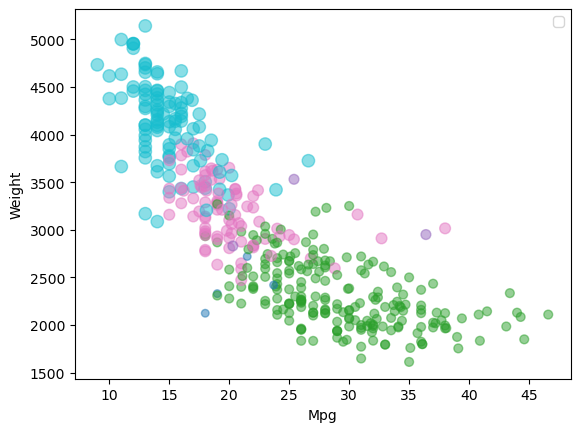

In [34]:
# - mpg와 weight 관계 산점도(scatter) 시각화
plt.scatter(dataDF['mpg'],dataDF['weight'], s=dataDF['cylinders']*10,c=dataDF['cylinders'],
            cmap='tab10',alpha=0.5)
plt.xlabel('Mpg')
plt.ylabel('Weight')
plt.legend()
plt.show()